In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification


In [2]:
df_uber_april  = pd.read_csv('/Users/shubh/Downloads/trips/uber-raw-data-apr14.csv')  
df_uber_may = pd.read_csv('/Users/shubh/Downloads/trips/uber-raw-data-may14.csv')
df_uber_june =pd.read_csv('/Users/shubh/Downloads/trips/uber-raw-data-jun14.csv')
df_uber_july = pd.read_csv('/Users/shubh/Downloads/trips/uber-raw-data-jul14.csv')
df_uber_aug = pd.read_csv('/Users/shubh/Downloads/trips/uber-raw-data-aug14.csv')
df_uber_sept = pd.read_csv('/Users/shubh/Downloads/trips/uber-raw-data-sep14.csv')

df_uber_jan_feb = pd.read_csv('/Users/shubh/Downloads/trips/Uber-Jan-Feb-FOIL.csv')
df_uber_jan_june = pd.read_csv('/Users/shubh/Downloads/trips/uber-raw-data-janjune-15.csv')


df_skyline = pd.read_csv('/Users/shubh/Downloads/trips/other-Skyline_B00111.csv')
df_prestige = pd.read_csv('/Users/shubh/Downloads/trips/other-Prestige_B01338.csv', encoding ='latin1')
df_lyft = pd.read_csv('/Users/shubh/Downloads/trips/other-Lyft_B02510.csv')
df_high_class = pd.read_csv('/Users/shubh/Downloads/trips/other-Highclass_B01717.csv', encoding ='latin1')
df_first_class = pd.read_csv('/Users/shubh/Downloads/trips/other-Firstclass_B01536.csv', encoding ='latin1')
df_federal = pd.read_csv('/Users/shubh/Downloads/trips/other-Federal_02216.csv')
df_fhv = pd.read_csv('/Users/shubh/Downloads/trips/other-FHV-services_jan-aug-2015.csv', encoding ='latin1')
df_diplo = pd.read_csv('/Users/shubh/Downloads/trips/other-Diplo_B01196.csv', encoding ='latin1')
df_dial = pd.read_csv('/Users/shubh/Downloads/trips/other-Dial7_B00887.csv', encoding ='latin1')
df_carmel = pd.read_csv('/Users/shubh/Downloads/trips/other-Carmel_B00256.csv', encoding ='latin1')
df_american = pd.read_csv('/Users/shubh/Downloads/trips/other-American_B01362.csv', encoding ='latin1')



# Structuring Data

In [3]:
df_uber_april['Date/Time'] = pd.to_datetime(df_uber_april['Date/Time'], format="%m/%d/%Y %H:%M:%S" )
df_uber_may['Date/Time'] = pd.to_datetime(df_uber_may['Date/Time'], format="%m/%d/%Y %H:%M:%S" )
df_uber_june['Date/Time'] = pd.to_datetime(df_uber_june['Date/Time'], format="%m/%d/%Y %H:%M:%S" )
df_uber_july['Date/Time'] = pd.to_datetime(df_uber_july['Date/Time'], format="%m/%d/%Y %H:%M:%S" )
df_uber_aug['Date/Time'] = pd.to_datetime(df_uber_aug['Date/Time'], format="%m/%d/%Y %H:%M:%S" )
df_uber_sept['Date/Time'] = pd.to_datetime(df_uber_sept['Date/Time'], format="%m/%d/%Y %H:%M:%S" )

In [4]:
df_uber_2014 = pd.concat([df_uber_april, df_uber_may, df_uber_june, df_uber_july, df_uber_aug, df_uber_sept], ignore_index=True)
df_uber_2014['Company'] = "Uber"

In [5]:
df_uber_2014.head()

,Date/Time,Lat,Lon,Base,Company
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Uber
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Uber
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Uber
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Uber
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Uber


In [6]:
df_skyline.rename(columns={'Date': 'Date/Time'}, inplace=True)
df_prestige.rename(columns={'DATE': 'Date/Time'}, inplace=True)
df_lyft.rename(columns={'time_of_trip': 'Date/Time'}, inplace=True)
df_high_class.rename(columns={'DATE': 'Date/Time'}, inplace=True)
df_first_class.rename(columns={'DATE': 'Date/Time'}, inplace=True)
df_federal.rename(columns={'Date': 'Date/Time'}, inplace=True)
df_fhv.rename(columns={'Pick Up Date': 'Date/Time'}, inplace=True)
df_diplo.rename(columns={'Date': 'Date/Time'}, inplace=True)
df_dial.rename(columns={'Date': 'Date/Time'}, inplace=True)
df_carmel.rename(columns={'Date': 'Date/Time'}, inplace=True)
df_american.rename(columns={'DATE': 'Date/Time'}, inplace=True)

In [7]:
df_skyline.head()

,Date/Time,Time,Street_Address,City_State,Unnamed: 4,Unnamed: 5
0,7/1/2014,20:27,622 THIRD AV,M,NaN,NaN
1,7/1/2014,21:04,E 77TH ST,M,NaN,NaN
2,7/1/2014,22:20,67 WEST PALISADES BLVD,PALISADES PARK NJ,NaN,NaN
3,7/1/2014,12:28,130 MIDDLE NECK RD,SANDS POINT LI,NaN,NaN
4,7/1/2014,16:45,36 E 31ST ST,M,NaN,NaN


In [8]:
df_skyline.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)
df_skyline['Date/Time'] = df_skyline['Date/Time'].astype(str)+ df_skyline['Time'].astype(str)
df_skyline['Date/Time'] = df_skyline['Date/Time'].apply(lambda x : str(x).replace(" ", ""))
df_skyline['Date/Time'] = pd.to_datetime(df_skyline['Date/Time'], format="%m/%d/%Y%H:%M" )
df_skyline.drop('Time',axis=1, inplace=True)
df_skyline['Pick_Address'] = df_skyline['    Street_Address '] + df_skyline['    City_State ']
df_skyline.drop(['    City_State ', '    Street_Address '],axis=1, inplace=True)
df_skyline['company'] = "Skyline"
df_skyline.columns = ['Date/Time', 'Pick_Address', 'Company']

In [9]:
df_skyline.head()

,Date/Time,Pick_Address,Company
0,2014-07-01 20:27:00,622 THIRD AV M ...,Skyline
1,2014-07-01 21:04:00,E 77TH ST M ...,Skyline
2,2014-07-01 22:20:00,67 WEST PALISADES BLVD PALISADES ...,Skyline
3,2014-07-01 12:28:00,130 MIDDLE NECK RD SANDS POIN...,Skyline
4,2014-07-01 16:45:00,36 E 31ST ST M ...,Skyline


In [10]:
df_prestige.head()

,Date/Time,TIME,PICK UP ADDRESS
0,7/1/2014,12:00:00 AM,"2557 Marion Ave Fordham, BX"
1,7/1/2014,12:00:00 AM,"45 E Mosholu Pkwy N Williamsbridge, BX"
2,7/1/2014,12:00:00 AM,"458 E 143rd St Mott Haven, BX"
3,7/1/2014,12:02:00 AM,"MINIVAN SUV 2557 Marion Ave Fordham, BX"
4,7/1/2014,12:02:00 AM,"1117 Westchester Ave Foxhurst, BX"


In [11]:
df_prestige['Date/Time'] = df_prestige['Date/Time'].astype(str)+ df_prestige['TIME'].astype(str)
df_prestige['Date/Time'] = df_prestige['Date/Time'].apply(lambda x : str(x).replace(" ", "").replace("AM", "").replace("PM",""))
df_prestige['Date/Time'] = pd.to_datetime(df_prestige['Date/Time'], format="%m/%d/%Y%H:%M:%S" )
df_prestige.drop('TIME', axis=1, inplace=True)
df_prestige['company'] = "Prestige"
df_prestige.columns  = ['Date/Time', 'Pick_Address', 'Company']

In [12]:
df_prestige.head()

,Date/Time,Pick_Address,Company
0,2014-07-01 12:00:00,"2557 Marion Ave Fordham, BX",Prestige
1,2014-07-01 12:00:00,"45 E Mosholu Pkwy N Williamsbridge, BX",Prestige
2,2014-07-01 12:00:00,"458 E 143rd St Mott Haven, BX",Prestige
3,2014-07-01 12:02:00,"MINIVAN SUV 2557 Marion Ave Fordham, BX",Prestige
4,2014-07-01 12:02:00,"1117 Westchester Ave Foxhurst, BX",Prestige


In [13]:
df_lyft.head()

,Date/Time,start_lat,start_lng,Unnamed: 3
0,9/4/2014 9:51,40.64705,-73.77988,NaN
1,8/27/2014 21:13,40.74916,-73.98373,NaN
2,9/4/2014 14:16,40.64065,-73.97594,NaN
3,9/4/2014 16:08,40.75002,-73.99514,NaN
4,8/28/2014 2:41,40.76715,-73.98636,NaN


In [14]:
df_lyft.drop('Unnamed: 3', axis=1, inplace=True)
df_lyft['Date/Time'] = pd.to_datetime(df_lyft['Date/Time'], format="%m/%d/%Y %H:%M" )
df_lyft.columns = ['Date/Time','Lat', 'Lon']
df_lyft['Company'] = "Lyft"
df_lyft.dropna(inplace=True)

In [15]:
df_lyft.head()

,Date/Time,Lat,Lon,Company
0,2014-09-04 09:51:00,40.64705,-73.77988,Lyft
1,2014-08-27 21:13:00,40.74916,-73.98373,Lyft
2,2014-09-04 14:16:00,40.64065,-73.97594,Lyft
3,2014-09-04 16:08:00,40.75002,-73.99514,Lyft
4,2014-08-28 02:41:00,40.76715,-73.98636,Lyft


In [16]:
df_high_class.head()

,Date/Time,TIME,PU_Address
0,7/1/2014,12:00:00 AM,"2976 Marion Ave Fordham, BX"
1,7/1/2014,12:01:00 AM,"780 Grand Concourse Cortlandt, BX"
2,7/1/2014,12:01:00 AM,"105 Elliot Pl High Bridge, BX"
3,7/1/2014,12:03:00 AM,2825 Webb Ave Bronx
4,7/1/2014,12:04:00 AM,"1878 Cedar Ave Morris Heights, BX"


In [17]:
df_high_class['Date/Time'] = df_high_class['Date/Time'].astype(str)+ df_high_class['TIME'].astype(str)
df_high_class['Date/Time'] = df_high_class['Date/Time'].apply(lambda x : str(x).replace(" ", "").replace("AM", "").replace("PM",""))
df_high_class['Date/Time'] = pd.to_datetime(df_high_class['Date/Time'], format="%m/%d/%Y%H:%M:%S" )
df_high_class.drop('TIME', axis=1, inplace=True)
df_high_class['company'] = "High_Class"
df_high_class.columns  = ['Date/Time', 'Pick_Address', 'Company']

In [18]:
df_high_class.head()

,Date/Time,Pick_Address,Company
0,2014-07-01 12:00:00,"2976 Marion Ave Fordham, BX",High_Class
1,2014-07-01 12:01:00,"780 Grand Concourse Cortlandt, BX",High_Class
2,2014-07-01 12:01:00,"105 Elliot Pl High Bridge, BX",High_Class
3,2014-07-01 12:03:00,2825 Webb Ave Bronx,High_Class
4,2014-07-01 12:04:00,"1878 Cedar Ave Morris Heights, BX",High_Class


In [19]:
df_first_class.head()

,Date/Time,TIME,PICK UP ADDRESS
0,7/1/2014,12:02:00 AM,"5360 Broadway Kingsbridge, BX"
1,7/1/2014,12:02:00 AM,546 Isham St NYC
2,7/1/2014,12:03:00 AM,234 Bradhurst Ave NYC
3,7/1/2014,12:07:00 AM,99 Marble Hill Ave Bronx
4,7/1/2014,12:08:00 AM,120 Vermilyea Ave NYC


In [20]:
df_first_class['Date/Time'] = df_first_class['Date/Time'].astype(str)+ df_first_class['TIME'].astype(str)
df_first_class['Date/Time'] = df_first_class['Date/Time'].apply(lambda x : str(x).replace(" ", "").replace("AM", "").replace("PM",""))
df_first_class['Date/Time'] = pd.to_datetime(df_first_class['Date/Time'], format="%m/%d/%Y%H:%M:%S" )
df_first_class.drop('TIME', axis=1, inplace=True)
df_first_class['company'] = "First_Class"
df_first_class.columns  = ['Date/Time', 'Pick_Address', 'Company']

In [21]:
df_first_class.head()

,Date/Time,Pick_Address,Company
0,2014-07-01 12:02:00,"5360 Broadway Kingsbridge, BX",First_Class
1,2014-07-01 12:02:00,546 Isham St NYC,First_Class
2,2014-07-01 12:03:00,234 Bradhurst Ave NYC,First_Class
3,2014-07-01 12:07:00,99 Marble Hill Ave Bronx,First_Class
4,2014-07-01 12:08:00,120 Vermilyea Ave NYC,First_Class


In [22]:
df_federal.head()

,Date/Time,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,07/01/2014,09:00 AM,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,07/01/2014,09:30 AM,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned


In [23]:
df_federal['Date/Time'] = df_federal['Date/Time'].astype(str)+ df_federal['Time'].astype(str)
df_federal['Date/Time'] = df_federal['Date/Time'].apply(lambda x : str(x).replace(" ", "").replace("AM", "").replace("PM",""))
df_federal['Date/Time'] = pd.to_datetime(df_federal['Date/Time'], format="%m/%d/%Y%H:%M")
df_federal.drop('Time', axis=1, inplace=True)
df_federal.drop(['Routing Details', 'PU_Address.1', 'Status'], axis=1, inplace=True)
df_federal.columns = ['Date/Time', 'Pick_Address', 'Drop_Address']
df_federal['Company'] = "Federal"


In [24]:
df_federal.head()

,Date/Time,Pick_Address,Drop_Address,Company
0,2014-07-01 07:15:00,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;",Federal
1,2014-07-01 07:30:00,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...",Federal
2,2014-07-01 08:00:00,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;",Federal
3,2014-07-01 09:00:00,"128 East 31 St., BK NY;","369 93rd St., BK NY;",Federal
4,2014-07-01 09:30:00,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,Federal


In [25]:
df_diplo.head()

,Date/Time,Time,PU_Address
0,7/1/2014,12:00:00 AM,"2396 Valentine Ave Fordham, BX"
1,7/1/2014,12:01:00 AM,"1859 Walton Ave Morris Heights, BX"
2,7/1/2014,12:02:00 AM,"2431 Jerome Ave Jerome, BX"
3,7/1/2014,12:05:00 AM,"3044 Valentine Ave Fordham, BX"
4,7/1/2014,12:05:00 AM,"1085 Nelson Ave High Bridge, BX"


In [26]:
df_diplo['Date/Time'] = df_diplo['Date/Time'].astype(str)+ df_diplo['Time'].astype(str)
df_diplo['Date/Time'] = df_diplo['Date/Time'].apply(lambda x : str(x).replace(" ", "").replace("AM", "").replace("PM",""))
df_diplo['Date/Time'] = pd.to_datetime(df_diplo['Date/Time'], format="%m/%d/%Y%H:%M:%S" )
df_diplo.drop('Time',axis=1, inplace=True)
df_diplo['Company'] = "Diplo"
df_diplo.columns = ['Date/Time', 'Pick_Address', 'Company']

In [27]:
df_diplo.head()

,Date/Time,Pick_Address,Company
0,2014-07-01 12:00:00,"2396 Valentine Ave Fordham, BX",Diplo
1,2014-07-01 12:01:00,"1859 Walton Ave Morris Heights, BX",Diplo
2,2014-07-01 12:02:00,"2431 Jerome Ave Jerome, BX",Diplo
3,2014-07-01 12:05:00,"3044 Valentine Ave Fordham, BX",Diplo
4,2014-07-01 12:05:00,"1085 Nelson Ave High Bridge, BX",Diplo


In [28]:
df_american.head()

,Date/Time,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN


In [29]:
df_american.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], inplace=True)
df_american['Date/Time'] = df_american['Date/Time'].astype(str)+ df_american['TIME'].astype(str)
df_american['Date/Time'] = df_american['Date/Time'].apply(lambda x : str(x).replace(" ", "").replace("AM", "").replace("PM",""))
df_american['Date/Time'] = pd.to_datetime(df_american['Date/Time'], format="%m/%d/%Y%H:%M:%S" )
df_american.drop('TIME',axis=1, inplace=True)
df_american['Company'] = "American"
df_american.columns = ['Date/Time', 'Pick_Address', 'Company']

In [30]:
df_american.head()

,Date/Time,Pick_Address,Company
0,2014-07-01 12:00:00,"874 E 139th St Mott Haven, BX",American
1,2014-07-01 12:01:00,"628 E 141st St Mott Haven, BX",American
2,2014-07-01 12:01:00,"601 E 156th St South Bronx, BX",American
3,2014-07-01 12:01:00,"708 E 138th St Mott Haven, BX",American
4,2014-07-01 12:02:00,"700 E 140th St Mott Haven, BX",American


In [31]:
df_dial.head()

,Date/Time,Time,State,PuFrom,Address,Street
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST


In [32]:
df_dial['Pick_Address'] = df_dial['Address'] + df_dial['Street'] + df_dial['PuFrom'] +df_dial['State']
df_dial.drop(['Address', 'Street', 'PuFrom', 'State'], axis=1, inplace=True)
df_dial['Date/Time'] = df_dial['Date/Time'].astype(str)+ df_dial['Time'].astype(str)
df_dial['Date/Time'] = df_dial['Date/Time'].apply(lambda x : str(x).replace(" ", ""))
df_dial.drop('Time', axis=1, inplace=True)
df_dial['Date/Time'] = pd.to_datetime(df_dial['Date/Time'], format="%Y.%m.%d%H:%M" )
df_dial['Company'] = 'Dial'

In [33]:
df_dial.head()

,Date/Time,Pick_Address,Company
0,2014-07-06 14:30:00,50MURRAY ST MANHATTANNY ...,Dial
1,2014-07-04 07:15:00,143AVENUE B MANHATTANNY ...,Dial
2,2014-07-05 05:45:00,125CHRISTOPHER ST MANHATTANNY ...,Dial
3,2014-07-06 04:30:00,217E 7 ST MANHATTANNY ...,Dial
4,2014-07-05 07:45:00,521W 26 ST MANHATTANNY ...,Dial


In [34]:
df_fhv.head()

,Base Number,Base Name,Date/Time,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62


In [35]:
df_fhv['Date/Time'] = pd.to_datetime(df_fhv['Date/Time'], format="%m/%d/%Y" )
df_fhv['Company'] = 'FHV'
df_fhv.rename({'Base Number' : 'Base'}, axis=1, inplace=True)

In [36]:
df_fhv.head()

,Base,Base Name,Date/Time,Number of Trips,Number of Vehicles,Company
0,B00013,LOVE CORP CAR INC,2015-01-01,26,17,FHV
1,B00014,NY ONE CORP CAR INC,2015-01-01,45,24,FHV
2,B00029,COMMUNITY CAR SVC CORP,2015-01-01,731,36,FHV
3,B00053,CHARGE AND RIDE INC,2015-01-01,10,9,FHV
4,B00095,LIBERTY CAR SERVICE INC.,2015-01-01,814,62,FHV


In [37]:
df_carmel.head()

,Date/Time,Time,PU_Adress,Base_No
0,7/1/2014,0:00,260 W 44 St NYC,B00256
1,7/1/2014,0:00,125 W 29 St Nyc,B00256
2,7/1/2014,0:00,141 W 28 St Nyc,B00256
3,7/1/2014,0:01,EWR,B00256
4,7/1/2014,0:07,JFK,B00256


In [38]:
df_carmel['Date/Time'] = df_carmel['Date/Time'].astype(str)+ df_carmel['Time'].astype(str)
df_carmel['Date/Time'] = df_carmel['Date/Time'].apply(lambda x : str(x).replace(" ", ""))
df_carmel.rename({'Base_No' : 'Base', 'PU_Adress' : 'Pick_Address'}, axis=1, inplace=True)
df_carmel.drop('Time', axis=1, inplace=True)
df_carmel['Date/Time'] = pd.to_datetime(df_carmel['Date/Time'], format="%m/%d/%Y%H:%M")
df_carmel['Company'] = 'Carmel'

In [39]:
df_carmel.head()

,Date/Time,Pick_Address,Base,Company
0,2014-07-01 00:00:00,260 W 44 St NYC,B00256,Carmel
1,2014-07-01 00:00:00,125 W 29 St Nyc,B00256,Carmel
2,2014-07-01 00:00:00,141 W 28 St Nyc,B00256,Carmel
3,2014-07-01 00:01:00,EWR,B00256,Carmel
4,2014-07-01 00:07:00,JFK,B00256,Carmel


In [40]:
df_other = pd.DataFrame()

In [41]:
df_other = df_other.append(df_skyline)
df_other = df_other.append(df_carmel)
df_other = df_other.append(df_american)
df_other = df_other.append(df_dial)
df_other = df_other.append(df_diplo)
df_other = df_other.append(df_fhv)
df_other = df_other.append(df_federal)
df_other = df_other.append(df_first_class)
df_other = df_other.append(df_high_class)
df_other = df_other.append(df_lyft)
df_other = df_other.append(df_prestige)
df_other = df_other[['Date/Time', 'Company', 'Pick_Address','Base', 'Lat', 'Lon', 'Drop_Address', 'Base Name', 'Number of Trips', 'Number of Vehicles']]

/Users/shubh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [42]:
df_other.head()

,Date/Time,Company,Pick_Address,Base,Lat,Lon,Drop_Address,Base Name,Number of Trips,Number of Vehicles
0,2014-07-01 20:27:00,Skyline,622 THIRD AV M ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-07-01 21:04:00,Skyline,E 77TH ST M ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-01 22:20:00,Skyline,67 WEST PALISADES BLVD PALISADES ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-07-01 12:28:00,Skyline,130 MIDDLE NECK RD SANDS POIN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-07-01 16:45:00,Skyline,36 E 31ST ST M ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_uber_jan_june.rename(columns={'Pickup_date': 'Date/Time'}, inplace=True)
df_uber_jan_june['Date/Time'] = pd.to_datetime(df_uber_jan_june['Date/Time'], format="%Y-%m-%d %H:%M:%S" )
df_uber_jan_june.drop('Affiliated_base_num', axis=1, inplace=True)
df_uber_jan_june.rename({'Dispatching_base_num' : 'Base'}, axis=1, inplace=True)
df_uber_jan_june['Company'] = "Uber"
df_uber_jan_june.columns = ['Base', 'Date/Time', 'locationID', 'Company']

In [44]:
df_uber_jan_feb.rename(columns={'date': 'Date/Time'}, inplace=True)
df_uber_jan_feb['Date/Time'] = pd.to_datetime(df_uber_jan_feb['Date/Time'], format="%m/%d/%Y")
df_uber_jan_feb.rename({'dispatching_base_number' : 'Base', 'active_vehicles': 'Number of Vehicles', "trips": 'Number of Trips'}, axis=1, inplace=True)
df_uber_jan_feb['Company'] = 'Uber'
df_uber_jan_feb.columns = ['Base', 'Date/Time', 'Number of Vehicles', 'Number of Trips', 'Company']

In [45]:
df_uber_2015 = pd.DataFrame()

In [46]:
df_uber_2015 = df_uber_2015.append(df_uber_jan_feb)

In [47]:
df_uber_2015.sort_values(by='Date/Time', inplace=True)
df_uber_2014.sort_values(by='Date/Time', inplace=True)
df_other.sort_values(by='Date/Time', inplace=True)

In [48]:
df_all = pd.DataFrame()

In [49]:
df_all = pd.concat([df_uber_2014, df_uber_2015, df_other], ignore_index=True)

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [50]:
df_all = df_all[['Date/Time','Company', 'Base', 'Lat', 
       'Lon','Pick_Address','Base Name', 'Number of Trips', 'Number of Vehicles', 'Drop_Address']]

In [51]:
df_all.head()

,Date/Time,Company,Base,Lat,Lon,Pick_Address,Base Name,Number of Trips,Number of Vehicles,Drop_Address
0,2014-04-01 00:00:00,Uber,B02598,40.7188,-73.9863,NaN,NaN,NaN,NaN,NaN
1,2014-04-01 00:00:00,Uber,B02682,40.7215,-73.9952,NaN,NaN,NaN,NaN,NaN
2,2014-04-01 00:00:00,Uber,B02598,40.7637,-73.9600,NaN,NaN,NaN,NaN,NaN
3,2014-04-01 00:01:00,Uber,B02617,40.7355,-73.9966,NaN,NaN,NaN,NaN,NaN
4,2014-04-01 00:02:00,Uber,B02682,40.7184,-73.9601,NaN,NaN,NaN,NaN,NaN


In [52]:
df_all.count()

Date/Time             6237642
Company               6237642
Base                  4817381
Lat                   4802027
Lon                   4802027
Pick_Address          1372043
Base Name               26181
Number of Trips         26535
Number of Vehicles      26535
Drop_Address              267
dtype: int64

In [53]:
start_date = '2014/01/01'
end_date = '2014/12/31'
df_all_2014 = df_all[(df_all['Date/Time']>=start_date) & (df_all['Date/Time']<=end_date)]

In [54]:
df_all_2014['Base'].fillna(method = 'ffill', inplace=True)
df_all_2014['Base'].fillna(method = 'bfill')

/Users/shubh/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0          B02598
1          B02682
2          B02598
3          B02617
4          B02682
5          B02598
6          B02598
7          B02598
8          B02617
9          B02682
10         B02598
11         B02617
12         B02682
13         B02617
14         B02617
15         B02682
16         B02682
17         B02682
18         B02617
19         B02682
20         B02682
21         B02598
22         B02682
23         B02598
24         B02682
25         B02512
26         B02682
27         B02682
28         B02682
29         B02682
            ...  
6211431    B00256
6211432    B00256
6211433    B00256
6211434    B00256
6211435    B00256
6211436    B00256
6211437    B00256
6211438    B00256
6211439    B00256
6211440    B00256
6211441    B00256
6211442    B00256
6211443    B00256
6211444    B00256
6211445    B00256
6211446    B00256
6211447    B00256
6211448    B00256
6211449    B00256
6211450    B00256
6211451    B00256
6211452    B00256
6211453    B00256
6211454    B00256
6211455   

In [55]:
df_all_2014.count()

Date/Time             6211107
Company               6211107
Base                  6211107
Lat                   4802027
Lon                   4802027
Pick_Address          1372043
Base Name                   0
Number of Trips             0
Number of Vehicles          0
Drop_Address              267
dtype: int64

In [56]:
df_all_2014.drop(['Base Name', 'Number of Trips', 'Number of Vehicles', 'Drop_Address'], axis=1, inplace=True)

/Users/shubh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
df_all_2014.head()

,Date/Time,Company,Base,Lat,Lon,Pick_Address
0,2014-04-01 00:00:00,Uber,B02598,40.7188,-73.9863,NaN
1,2014-04-01 00:00:00,Uber,B02682,40.7215,-73.9952,NaN
2,2014-04-01 00:00:00,Uber,B02598,40.7637,-73.9600,NaN
3,2014-04-01 00:01:00,Uber,B02617,40.7355,-73.9966,NaN
4,2014-04-01 00:02:00,Uber,B02682,40.7184,-73.9601,NaN


In [58]:
start_date = '2015/01/01'
end_date = '2015/12/31'
df_all_2015 = df_all[(df_all['Date/Time']>=start_date) & (df_all['Date/Time']<=end_date)]

In [59]:
df_all_2015.count()

Date/Time             26535
Company               26535
Base                  26535
Lat                       0
Lon                       0
Pick_Address              0
Base Name             26181
Number of Trips       26535
Number of Vehicles    26535
Drop_Address              0
dtype: int64

In [60]:
df_all_2015.drop(['Lat', 'Lon', 'Pick_Address', 'Drop_Address'], axis=1, inplace=True)

In [61]:
df_all_2015.head()

,Date/Time,Company,Base,Base Name,Number of Trips,Number of Vehicles
4534327,2015-01-01,Uber,B02512,NaN,1132,190
4534328,2015-01-01,Uber,B02765,NaN,1765,225
4534329,2015-01-01,Uber,B02764,NaN,29421,3427
4534330,2015-01-01,Uber,B02682,NaN,7679,945
4534331,2015-01-01,Uber,B02617,NaN,9537,1228


# Analysis of Data

In [62]:
df_all_2014['DayOfWeekNum'] = df_all_2014['Date/Time'].dt.dayofweek
df_all_2014['DayOfWeek'] = df_all_2014['Date/Time'].dt.weekday_name
df_all_2014['MonthDayNum'] = df_all_2014['Date/Time'].dt.day
df_all_2014['HourOfDay'] = df_all_2014['Date/Time'].dt.hour
df_all_2014['Only_Date'] = df_all_2014['Date/Time'].dt.date

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [63]:
df_all_2014.count()

Date/Time       6211107
Company         6211107
Base            6211107
Lat             4802027
Lon             4802027
Pick_Address    1372043
DayOfWeekNum    6211107
DayOfWeek       6211107
MonthDayNum     6211107
HourOfDay       6211107
Only_Date       6211107
dtype: int64

In [64]:
#Find out the number of trips per hour across all the cab services
hour_cab = df_all_2014.groupby(['HourOfDay', 'Company'])['Base'].count()
hour_cab

HourOfDay  Company    
0          Carmel           3736
           Dial             3628
           Lyft            20353
           Skyline          2104
           Uber           103836
1          American         7034
           Carmel           1705
           Dial             1628
           Diplo            7470
           Federal            22
           First_Class     13248
           High_Class      12097
           Lyft            20144
           Prestige        23858
           Skyline          1334
           Uber            67227
2          American         6127
           Carmel           1002
           Dial              868
           Diplo            6772
           Federal            12
           First_Class     11859
           High_Class      10877
           Lyft            19592
           Prestige        22284
           Skyline           698
           Uber            45865
3          American         5719
           Carmel           1586
           Dial     

In [65]:
hour_cab = df_all_2014.groupby(['HourOfDay', 'Company'])['Base'].count()
hour_cab

HourOfDay  Company    
0          Carmel           3736
           Dial             3628
           Lyft            20353
           Skyline          2104
           Uber           103836
1          American         7034
           Carmel           1705
           Dial             1628
           Diplo            7470
           Federal            22
           First_Class     13248
           High_Class      12097
           Lyft            20144
           Prestige        23858
           Skyline          1334
           Uber            67227
2          American         6127
           Carmel           1002
           Dial              868
           Diplo            6772
           Federal            12
           First_Class     11859
           High_Class      10877
           Lyft            19592
           Prestige        22284
           Skyline           698
           Uber            45865
3          American         5719
           Carmel           1586
           Dial     

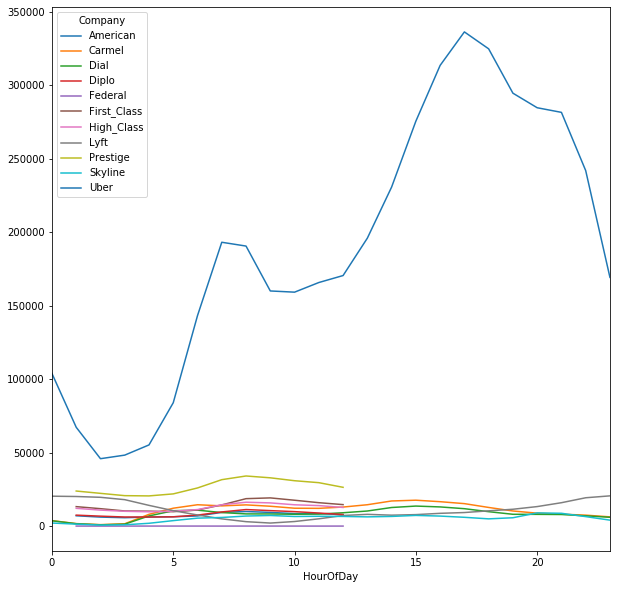

In [66]:
# plot data
fig, ax = plt.subplots(figsize=(10,10))
# use unstack()
df_all_2014.groupby(['HourOfDay', 'Company']).count()['Base'].unstack().plot(ax=ax)

In [67]:
#Find out how the trips per hour change across the months

In [68]:
hour_month = df_all_2014.groupby(['MonthDayNum', 'HourOfDay'])['Base'].count()
hour_month

MonthDayNum  HourOfDay
1            0             4073
             1             4629
             2             3700
             3             3622
             4             4111
             5             5026
             6             6762
             7             8684
             8             9140
             9             8398
             10            8139
             11            8282
             12            8198
             13            7097
             14            8473
             15            9504
             16           10227
             17           10963
             18            9950
             19            9330
             20            8739
             21            9164
             22            7458
             23            5144
2            0             3285
             1             4373
             2             3450
             3             3714
             4             4533
             5             5997
                 

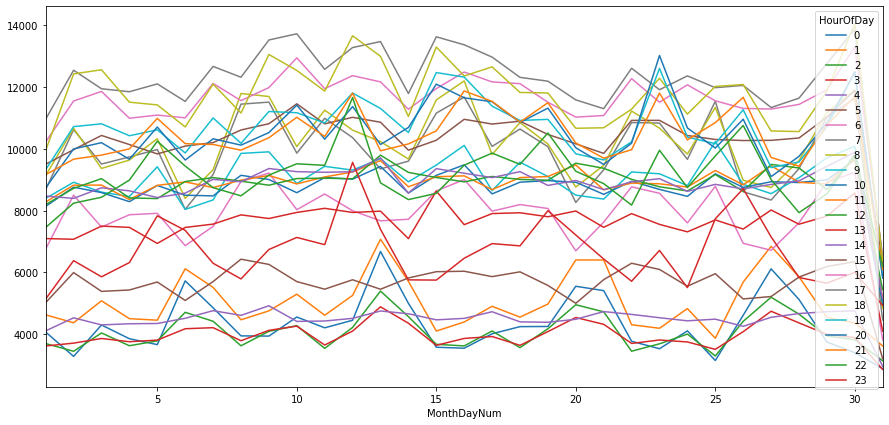

In [69]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_all_2014.groupby(['MonthDayNum', 'HourOfDay']).count()['Base'].unstack().plot(ax=ax)

In [70]:
from geopy.geocoders import Nominatim

In [71]:
#Find out the number of trips per day of the week over months

In [72]:
day_month = df_all_2014.groupby(['DayOfWeek', 'MonthDayNum'])['Base'].count()
day_month

DayOfWeek  MonthDayNum
Friday     1              50766
           2              24235
           4              53997
           5              64725
           6              24683
           8              53189
           9              26385
           11             65517
           12             61558
           13             31207
           15             51084
           16             32493
           18             64056
           19             61371
           20             24271
           22             51638
           23             26465
           25             71513
           26             56440
           27             24895
           29             50581
           30             24413
Monday     1              37724
           2              17503
           4              42357
           5              17859
           7              52821
           8              49807
           9              23244
           11             42264
                 

In [73]:
# find the highest, minimum, and the average trips per day per cab service.

In [74]:
xyz = df_all_2014.groupby(['Company', 'Only_Date'])['Base'].count()
xyz


Company   Only_Date 
American  2014-07-01      921
          2014-07-02     1028
          2014-07-03     1068
          2014-07-04     1008
          2014-07-05     1214
          2014-07-06     1048
          2014-07-07      893
          2014-07-08      916
          2014-07-09      841
          2014-07-10      823
          2014-07-11     1067
          2014-07-12     1284
          2014-07-13     1060
          2014-07-14      900
          2014-07-15      959
          2014-07-16      907
          2014-07-17      944
          2014-07-18     1077
          2014-07-19     1246
          2014-07-20     1122
          2014-07-21      839
          2014-07-22      778
          2014-07-23      893
          2014-07-24      850
          2014-07-25     1084
          2014-07-26     1188
          2014-07-27     1082
          2014-07-28      828
          2014-07-29      782
          2014-07-30      825
                        ...  
Uber      2014-09-01    19961
          2014-09-0

In [75]:
xyz.min(level=0)

Company
American         768
Carmel          1846
Dial            1371
Diplo            810
Federal            1
First_Class     1211
High_Class      1315
Lyft              40
Prestige        2781
Skyline          276
Uber           10202
Name: Base, dtype: int64

In [76]:
xyz.mean(level=0)

Company
American         996.869565
Carmel          2788.250000
Dial            2119.478261
Diplo           1071.195652
Federal            3.325301
First_Class     1812.706522
High_Class      1651.358696
Lyft            3936.764706
Prestige        3485.228261
Skyline         1388.000000
Uber           24777.743169
Name: Base, dtype: float64

In [77]:
xyz.max(level=0)

Company
American        1440
Carmel          3507
Dial            2795
Diplo           1440
Federal           12
First_Class     2228
High_Class      2375
Lyft            7740
Prestige        4470
Skyline         2230
Uber           43205
Name: Base, dtype: int64

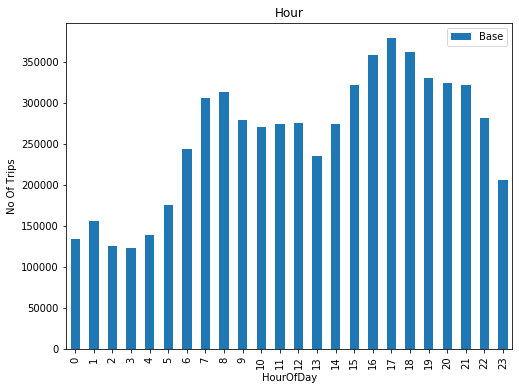

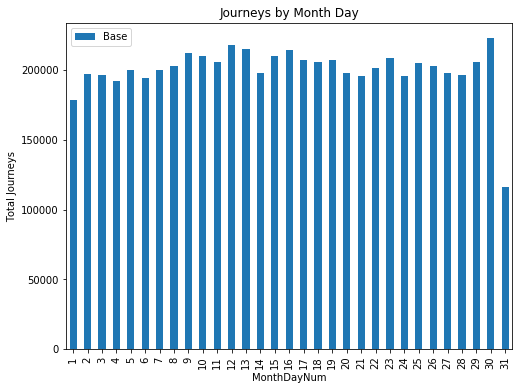

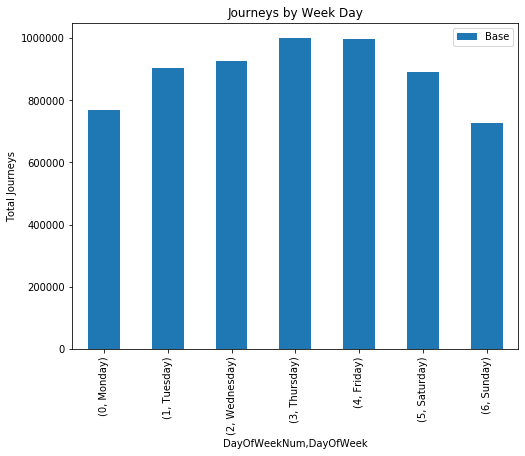

In [78]:
df_all_2014_hour = df_all_2014.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
df_all_2014_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('No Of Trips')
plt.title('Hour');


df_all_2014_month = df_all_2014.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
df_all_2014_month.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');


df_all_2014_weekday = df_all_2014.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
df_all_2014_weekday.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

In [79]:
df_uber_jan_june.sort_values('Date/Time', inplace=True)

In [80]:
df_all_2015.count()

Date/Time             26535
Company               26535
Base                  26535
Base Name             26181
Number of Trips       26535
Number of Vehicles    26535
dtype: int64

In [81]:
df_all_2015['DayOfWeekNum'] = df_all_2015['Date/Time'].dt.dayofweek
df_all_2015['DayOfWeek'] = df_all_2015['Date/Time'].dt.weekday_name
df_all_2015['MonthDayNum'] = df_all_2015['Date/Time'].dt.day
df_all_2015['month'] = df_all_2015['Date/Time'].dt.month

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [82]:
df_all_2015.head()

,Date/Time,Company,Base,Base Name,Number of Trips,Number of Vehicles,DayOfWeekNum,DayOfWeek,MonthDayNum,month
4534327,2015-01-01,Uber,B02512,NaN,1132,190,3,Thursday,1,1
4534328,2015-01-01,Uber,B02765,NaN,1765,225,3,Thursday,1,1
4534329,2015-01-01,Uber,B02764,NaN,29421,3427,3,Thursday,1,1
4534330,2015-01-01,Uber,B02682,NaN,7679,945,3,Thursday,1,1
4534331,2015-01-01,Uber,B02617,NaN,9537,1228,3,Thursday,1,1


In [83]:
df_all_2015.dtypes

Date/Time             datetime64[ns]
Company                       object
Base                          object
Base Name                     object
Number of Trips               object
Number of Vehicles            object
DayOfWeekNum                   int64
DayOfWeek                     object
MonthDayNum                    int64
month                          int64
dtype: object

In [84]:
df_all_2015['Number of Vehicles'] = df_all_2015['Number of Vehicles'].apply(lambda x: str(x).replace("-", "0"))

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_all_2015['Number of Vehicles'] = df_all_2015['Number of Vehicles'].apply(lambda x: int(x))

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
#Find out if you can figure out how many vehicles were active on any particular day

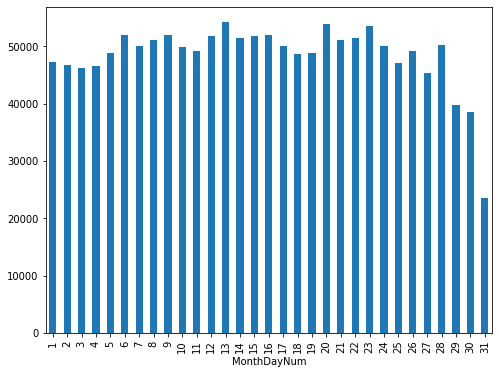

In [87]:
df_all_2015.groupby('MonthDayNum')['Number of Vehicles'].sum().plot(kind='bar', figsize = (8,6))

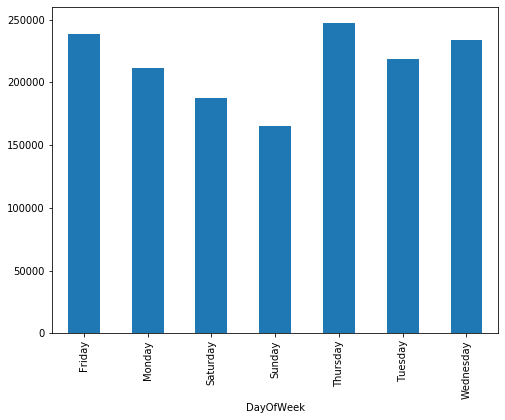

In [88]:
df_all_2015.groupby('DayOfWeek')['Number of Vehicles'].sum().plot(kind='bar', figsize = (8,6))

# Exploration

In [89]:
df_all_2014['month'] = df_all_2014['Date/Time'].dt.month

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


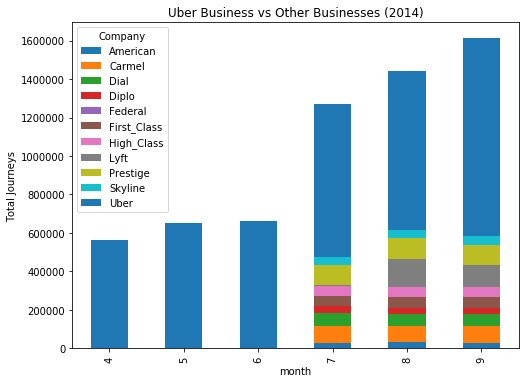

In [90]:
# Business Comparison

df_all_2014.groupby(['month','Company']).count().unstack('Company')['Date/Time'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Uber Business vs Other Businesses (2014)');

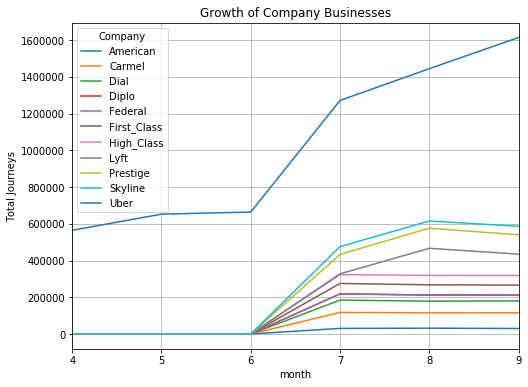

In [91]:
# Growth
df_all_2014.groupby(['month','Company']).count().unstack('Company')['Date/Time'].plot(figsize = (8,6),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Growth of Company Businesses');
plt.grid()

In [92]:
df_all_2014['Cordinates'] = df_all_2014['Lat'].astype(str) + "," + df_all_2014['Lon'].astype(str)

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_all_2014.head()

,Date/Time,Company,Base,Lat,Lon,Pick_Address,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,Only_Date,month,Cordinates
0,2014-04-01 00:00:00,Uber,B02598,40.7188,-73.9863,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7188,-73.9863"
1,2014-04-01 00:00:00,Uber,B02682,40.7215,-73.9952,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7215,-73.9952"
2,2014-04-01 00:00:00,Uber,B02598,40.7637,-73.9600,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7637,-73.96"
3,2014-04-01 00:01:00,Uber,B02617,40.7355,-73.9966,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7355,-73.9966"
4,2014-04-01 00:02:00,Uber,B02682,40.7184,-73.9601,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7184,-73.9601"


In [94]:
#Find out a way to bin/bucket the lat/longs or to localize the lat/long to an area name.

In [95]:
geolocator = Nominatim(user_agent="Cab_Data")
def get_location(x):
    location = geolocator.reverse(x)
    return location.address
    
    

In [96]:
get_location(df_all_2014.loc[1,'Cordinates'])

'24, Spring Street, Little Italy, Manhattan Community Board 2, Manhattan, New York County, NYC, New York, 10012, USA'

In [97]:
df_all_2014.head()

,Date/Time,Company,Base,Lat,Lon,Pick_Address,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,Only_Date,month,Cordinates
0,2014-04-01 00:00:00,Uber,B02598,40.7188,-73.9863,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7188,-73.9863"
1,2014-04-01 00:00:00,Uber,B02682,40.7215,-73.9952,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7215,-73.9952"
2,2014-04-01 00:00:00,Uber,B02598,40.7637,-73.9600,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7637,-73.96"
3,2014-04-01 00:01:00,Uber,B02617,40.7355,-73.9966,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7355,-73.9966"
4,2014-04-01 00:02:00,Uber,B02682,40.7184,-73.9601,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7184,-73.9601"


In [98]:
df = pd.DataFrame()

In [99]:
df['Count'] = df_all_2014.groupby('Date/Time')['Company'].count()

In [100]:
df.head()

,Count
Date/Time,
2014-04-01 00:00:00,3
2014-04-01 00:01:00,1
2014-04-01 00:02:00,3
2014-04-01 00:03:00,2
2014-04-01 00:04:00,1


In [101]:
df_all_2014['Count'] = df_all_2014['Date/Time'].apply(lambda x : df.loc[x, 'Count'])

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_all_2014.head()

,Date/Time,Company,Base,Lat,Lon,Pick_Address,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,Only_Date,month,Cordinates,Count
0,2014-04-01 00:00:00,Uber,B02598,40.7188,-73.9863,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7188,-73.9863",3
1,2014-04-01 00:00:00,Uber,B02682,40.7215,-73.9952,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7215,-73.9952",3
2,2014-04-01 00:00:00,Uber,B02598,40.7637,-73.9600,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7637,-73.96",3
3,2014-04-01 00:01:00,Uber,B02617,40.7355,-73.9966,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7355,-73.9966",1
4,2014-04-01 00:02:00,Uber,B02682,40.7184,-73.9601,NaN,1,Tuesday,1,0,2014-04-01,4,"40.7184,-73.9601",3


In [103]:
df_all_2014.drop('Pick_Address', axis=1, inplace=True)

/Users/shubh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [104]:
df_all_2014.drop('Cordinates', axis=1, inplace=True)

In [106]:
df_all_2014.drop('Base', axis=1, inplace=True)

In [117]:
df_all_2014.drop('Only_Date', axis=1, inplace=True)

/Users/shubh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [107]:
df_all_2014.set_index('Date/Time', inplace=True)

In [108]:
df_all_2014.dropna(inplace=True)

/Users/shubh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
df_all_2014.shape

(4802027, 9)

In [119]:
X = df_all_2014.iloc[:, :-1].values
y = df_all_2014.iloc[:, -1].values

In [120]:
X[:,4]

array(['Tuesday', 'Tuesday', 'Tuesday', ..., 'Tuesday', 'Tuesday',
       'Tuesday'], dtype=object)

In [121]:
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

In [122]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [123]:
models=[RandomForestRegressor(),BaggingRegressor()]
model_names=['RandomForestRegressor','BaggingRegressor',]
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

/Users/shubh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Modelling Algo': ['RandomForestRegressor', 'BaggingRegressor'],
 'RMSLE': [0.2996105962792389, 0.2994599982275631]}